# Потери на проверочной выборке

In [16]:
from autoencoder import *

In [4]:
dataset = ClagnoscoDataset()
transformed_dataset = TransformedClagnoscoDataset(dataset)

train_batches, test_batches = dataset.random_splitting_batching_buckets(batch_size=-1, seed=430)

In [ ]:
models = [
    "autoencoder_2025-05-11_09-25-02_epoch_71.pt",
    ]

In [4]:
avg_losses_dict, losses_dict = test_models(models, test_batches, transformed_dataset, save_avg=False)

Testing model: autoencoder_2025-05-11_09-25-02_epoch_71.pt
Loading selected model: autoencoder_2025-05-11_09-25-02_epoch_71.pt


Testing:   0%|          | 0/42833 [00:00<?, ?it/s]

Avg Loss: 0.031567


In [5]:
for model in avg_losses_dict:
    print(f"{model}\t{avg_losses_dict[model]}")

autoencoder_2025-05-11_09-25-02_epoch_71.pt	0.0315666813020936


# Демонстрация на картинках

In [15]:
url = "https://huggingface.co/pogorzelskich/clagnosco_2025-05-11/resolve/main/model.pt?download=true"
model, _ = model_loader(url)
model.eval()
print("Модель загружена из Hugging Face")

Loaded model from URL: https://huggingface.co/pogorzelskich/clagnosco_2025-05-11/resolve/main/model.pt?download=true
Модель загружена из Hugging Face


In [ ]:
# Демнострация работы автоэнкодера на картинках
import matplotlib.pyplot as plt

test_list = batch_buckets_to_list(test_batches)

img_count = 200

images_origin = []
for i in range(img_count):
    images_origin.append(dataset[test_list[i]]["image"])

images_reconstructed = []
for img in images_origin:
    images_reconstructed.append(run_image_through_autoencoder(model, img)[1])

# PLT Оригиналы и реконструкции
fig, axs = plt.subplots(2, img_count, figsize=(img_count*2, 4))
for i in range(img_count):
    axs[0, i].imshow(images_origin[i], cmap='gray')
    axs[0, i].axis('off')
    axs[1, i].imshow(images_reconstructed[i], cmap='gray')
    axs[1, i].axis('off')


In [4]:
# restored_img to tensor and print it (not shape and not instance of Image)

transform = transforms.Compose([
    transforms.ToTensor(),
])

img_tensor = transform(restored_img)  # [1, 3, H, W]
img_tensor

tensor([[[0.4745, 0.4784, 0.4745,  ..., 0.4784, 0.4745, 0.4745],
         [0.4745, 0.4667, 0.4784,  ..., 0.4667, 0.4784, 0.4706],
         [0.4745, 0.4824, 0.4745,  ..., 0.4824, 0.4745, 0.4745],
         ...,
         [0.4745, 0.4667, 0.4784,  ..., 0.4667, 0.4784, 0.4706],
         [0.4745, 0.4824, 0.4745,  ..., 0.4824, 0.4784, 0.4784],
         [0.4706, 0.4706, 0.4745,  ..., 0.4706, 0.4745, 0.4745]],

        [[0.4863, 0.4863, 0.4902,  ..., 0.4863, 0.4902, 0.4824],
         [0.4902, 0.4863, 0.4863,  ..., 0.4863, 0.4863, 0.4824],
         [0.4863, 0.4902, 0.4863,  ..., 0.4863, 0.4863, 0.4824],
         ...,
         [0.4902, 0.4863, 0.4863,  ..., 0.4863, 0.4863, 0.4824],
         [0.4863, 0.4902, 0.4863,  ..., 0.4863, 0.4863, 0.4824],
         [0.4863, 0.4824, 0.4863,  ..., 0.4824, 0.4863, 0.4824]],

        [[0.4706, 0.4627, 0.4706,  ..., 0.4627, 0.4706, 0.4667],
         [0.4745, 0.4667, 0.4745,  ..., 0.4667, 0.4745, 0.4667],
         [0.4667, 0.4667, 0.4706,  ..., 0.4667, 0.4706, 0.

# Тестирование на картинке

In [1]:
from autoencoder import *

In [2]:
model, _ = model_loader()
model = model.to(DEVICE)
model.eval()
print("Модель загружена")

Loading latest model: autoencoder_2025-05-11_09-25-02_epoch_71.pt
Модель загружена


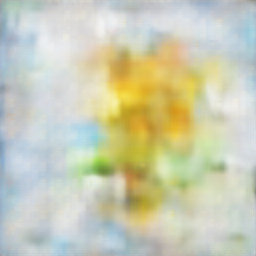

In [3]:
img = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/2-Finnic-branch.png/190px-2-Finnic-branch.png"
# img = r"C:\!project-dataset\images_resize\000d10f3c1c08fc3bf7a68322cab7b7f.jpg"
# img = r"C:\!project-dataset\images_resize\00a50fad781d7e2edc57b3780be70e7f.jpg"
# img = r"C:\!project-dataset\images_square\00a50fad781d7e2edc57b3780be70e7f.jpg"
# img = r"C:\!project-dataset\images_resize\00c6a6fa64971a4123306eeb09a1e5a4.jpg"

img = open_image(img)
# latent_vec, embedding_vec, restored_img = run_image_through_autoencoder(model, img)
latent_vec, restored_img = run_image_through_autoencoder(model, img)

restored_img

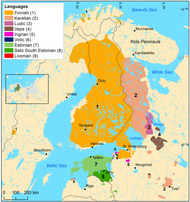

In [4]:
img

In [13]:
# Демонстрация латентного вектора
print(f"Латентный вектор ({latent_vec.shape[0]} признаков):")
for i in range(0, latent_vec.shape[0], 12):
    curr_vec = latent_vec[i:i+12]
    print(*[f"{vec:.2f}" for vec in curr_vec], sep="\t")

Латентный вектор (4096 признаков):
-0.71	-1.08	1.62	2.24	2.78	-0.02	0.14	-0.15	-0.11	-1.70	0.38	-4.02
0.85	-4.74	0.95	3.81	0.53	-0.89	-9.21	-1.65	3.11	-0.73	-0.55	1.65
-1.74	0.28	-1.73	-0.11	0.59	-0.08	0.17	3.29	-0.25	-1.37	-2.13	7.37
-0.39	0.53	0.72	2.00	-1.22	-0.53	-1.34	1.86	-0.66	-0.85	3.34	0.12
-0.32	5.12	1.44	0.90	-0.83	-0.46	0.45	-1.05	0.08	0.27	-1.03	-2.34
0.50	0.02	1.33	1.70	1.05	1.44	0.26	0.07	0.60	0.02	0.81	-1.12
-0.78	-0.76	0.26	0.13	-0.84	-0.85	-1.86	0.63	0.41	-0.01	-0.07	1.60
0.20	-1.14	0.42	1.59	-2.08	-1.40	-1.29	2.18	0.01	-0.36	1.62	2.28
0.67	-3.27	-2.45	0.36	-0.16	0.44	0.12	0.20	0.55	0.43	-0.64	1.22
0.21	-1.92	-1.63	-1.49	-0.34	-0.35	-1.83	-0.17	3.18	-1.05	4.52	-0.31
-1.15	-0.09	-0.70	-0.15	0.30	1.32	0.93	1.07	2.28	24.85	-0.44	0.83
1.13	0.37	-0.99	2.22	9.97	0.79	-0.04	1.30	-0.51	-1.34	1.42	-0.50
0.23	1.13	-0.21	-1.27	-2.96	-0.02	-1.28	-0.21	3.87	-0.48	-0.30	0.31
0.18	0.85	-1.69	-0.90	0.57	-0.58	-0.10	0.28	5.10	10.70	-1.04	-1.43
0.21	0.37	0.21	-0.40	-0.39	0.01	-0.02	1.8